<a href="https://colab.research.google.com/github/iceaiai/CS-team/blob/main/tutorial/3rd_tutorial_September_26th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution

In [1]:
!pip install hyperspy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.2/976.2 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.4 MB/s eta 0:00:00


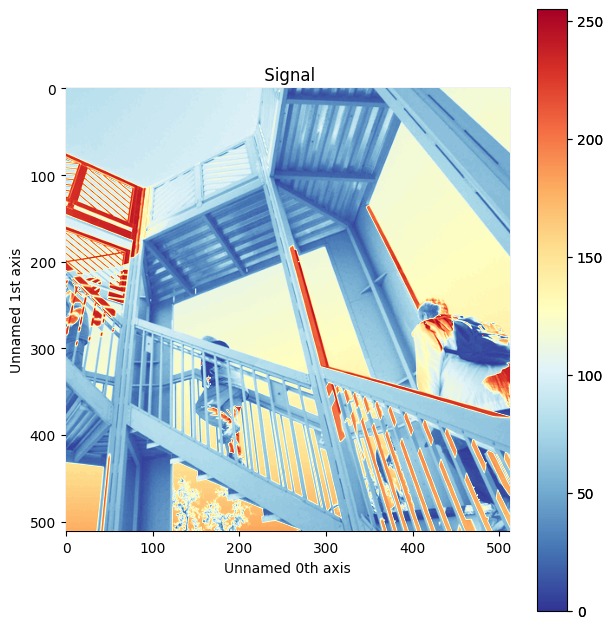

In [10]:
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import scipy
import cv2
img = hs.signals.Signal2D(scipy.datasets.ascent())
img.plot(colorbar=True, scalebar=False, axes_ticks=True, cmap='RdYlBu_r')


# Sharpening
##a. sharpened((emphasize the edges)) = original_image + (original_image − blurred_image) × amount.
  1. Original Image: The input image.
  2. Blurred Image: A blurred version of the image, typically obtained using a Gaussian blur.
  3. Amount: A scaling factor that controls the intensity of the sharpening effect.

##b. unsharpened((keep blurred features)) = original_image - (original_image − blurred_image) × amount.


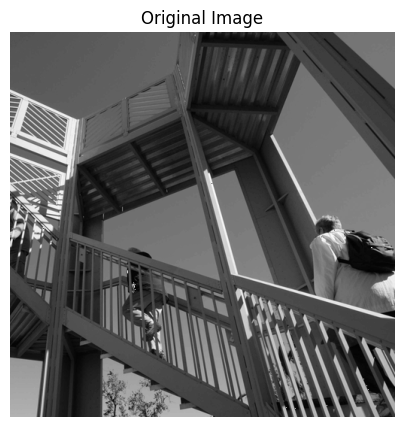

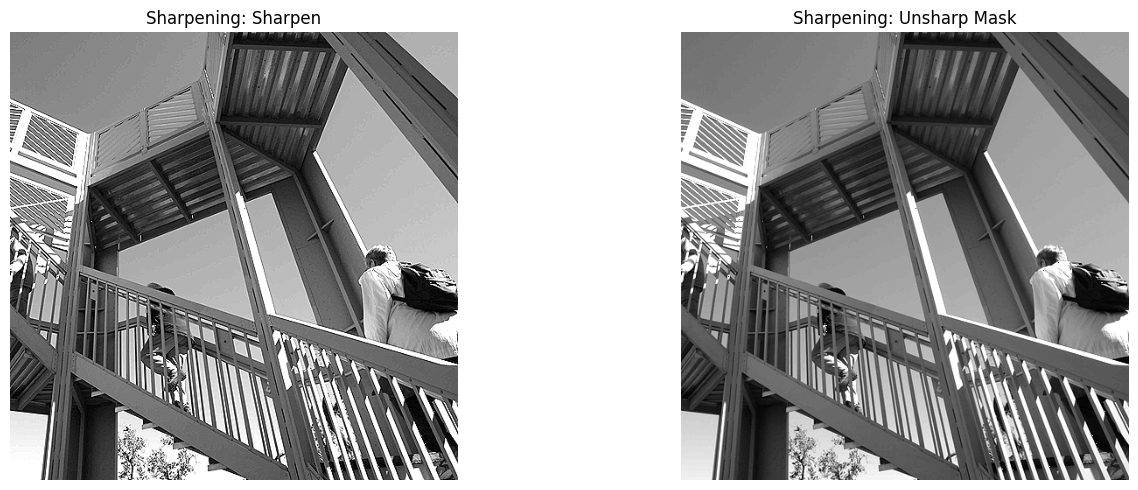

In [31]:
image_uint8 = img.data.astype(np.uint8)
def show_original_image(image):
    """Display the original image."""
    plt.figure(figsize=(15, 5))
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()
def display_category(category_name, images):
    if len(images) == 1:
        fig, ax = plt.subplots(figsize=(15, 5))
        ax.imshow(np.abs(images[0][1]), cmap='gray')
        ax.set_title(f"{category_name}: {images[0][0]}")
        ax.axis('off')
    else:
        fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
        for i, (name, img) in enumerate(images):
            axes[i].imshow(np.abs(img), cmap='gray')
            axes[i].set_title(f"{category_name}: {name}")
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

def apply_sharpening(image,scaler_s=1.0,scaler_un=1.0):
    sharpen_kernel = np.array([[0, -1, 0],
                  [-1, 5*scaler_s, -1],
                  [0, -1, 0]])
    unsharp_masking_kernel = np.array([[-1, -2, -1],
                      [-2, 28*scaler_un, -2],
                      [-1, -2, -1]]) / 16
    sharpen_image = cv2.filter2D(image, -1, sharpen_kernel)
    unsharp_image = cv2.filter2D(image, -1, unsharp_masking_kernel)
    display_category("Sharpening", [("Sharpen", sharpen_image), ("Unsharp Mask", unsharp_image)])
show_original_image(image_uint8)
apply_sharpening(image_uint8,1.1,1.2)

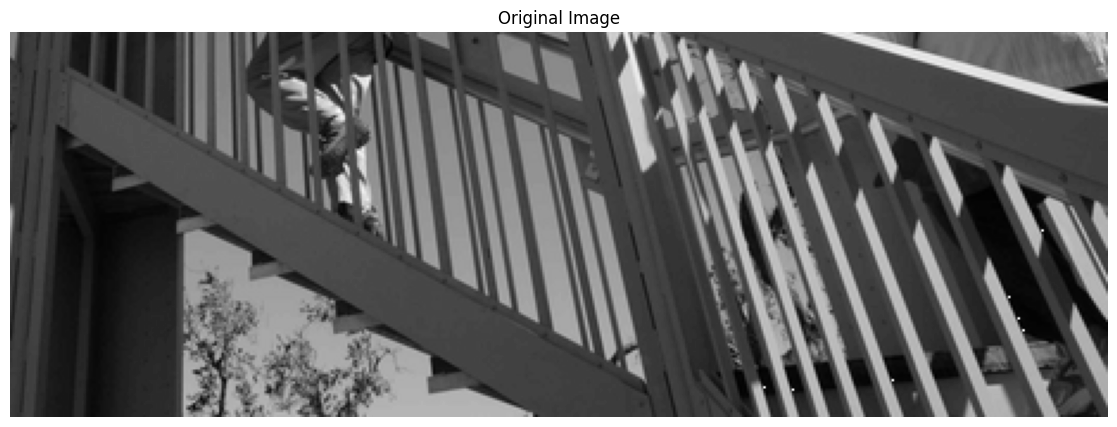

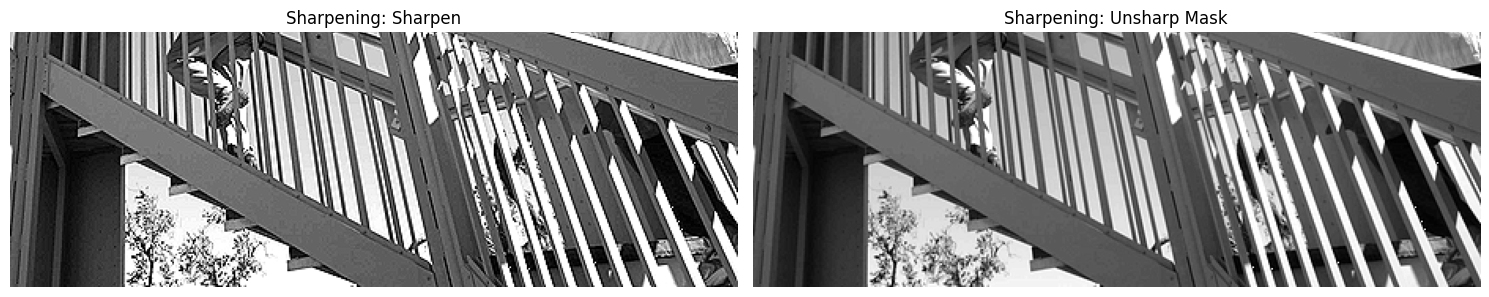

In [34]:
# Crop the image to highlight the details
def crop_image(image, start_row, start_col, end_row, end_col):
    """Crop the image based on the given coordinates."""
    return image[start_row:end_row, start_col:end_col]
start_row, start_col = 350, 50
end_row, end_col = 600, 600
cropped_image = crop_image(image_uint8, start_row, start_col, end_row, end_col)
show_original_image(cropped_image)
apply_sharpening(cropped_image, 1.1, 1.2)

##Blurring(meantioned before): Using Gaussian as an example

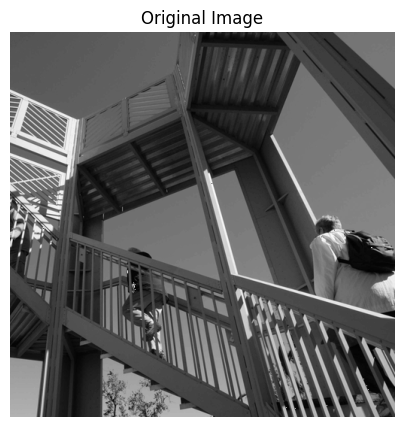

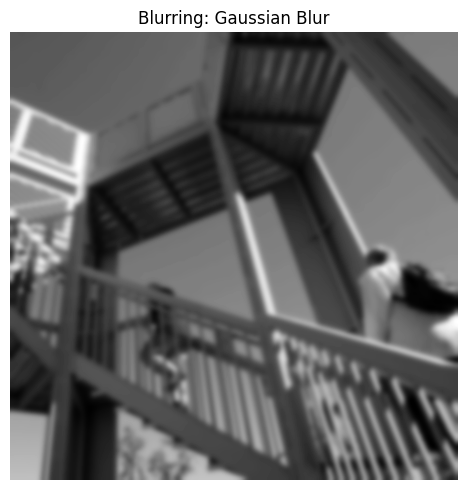

In [38]:
def apply_blurring(image, kernel_size=3):
    """Apply Gaussian blurring with adjustable kernel size."""
    gaussian_blur = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

    # Display the original image and blur results
    display_category("Blurring", [("Gaussian Blur", gaussian_blur)])
show_original_image(image_uint8)
apply_blurring(image_uint8, kernel_size=17)

## Edge detection
In image processing, edges represent areas where the pixel intensity changes sharply. These changes can be captured by calculating the gradient of the image, which measures the rate of intensity change. This gradient is calculated using derivatives of the image, and different kernels (like Sobel, Prewitt, Scharr, etc.) are used to approximate these derivatives.

The gradient at a pixel \((x, y)\) is defined as:
$$
\nabla I(x, y) = \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right)
$$
$\frac{\partial I}{\partial x}$ represents the change in intensity in the x-direction (horizontal)

$\frac{\partial I}{\partial y}$represents the change in intensity in the y-direction (vertical).


##Sobel

The Sobel operator computes an approximation of the image gradient. It uses two kernels to calculate gradients in the x and y directions.(https://docs.opencv.org/4.x/d2/d2c/tutorial_sobel_derivatives.html)
### Sobel X (horizontal edges):
The Sobel X operator detects horizontal edges and is represented by the following matrix:

$$
\text{Sobel X} =
\begin{bmatrix}
-1 & 0 & +1 \\
-2 & 0 & +2 \\
-1 & 0 & +1
\end{bmatrix}
$$
### Sobel Y (vertical edges):

The Sobel Y operator detects vertical edges and is represented by the following matrix:

$$
\text{Sobel Y} =
\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
+1 & +2 & +1
\end{bmatrix}
$$
### Sobel Operator (combined gradient):

The overall Sobel operator combines the horizontal and vertical components to calculate the gradient magnitude:

$$
G = \sqrt{G_x^2 + G_y^2}
$$


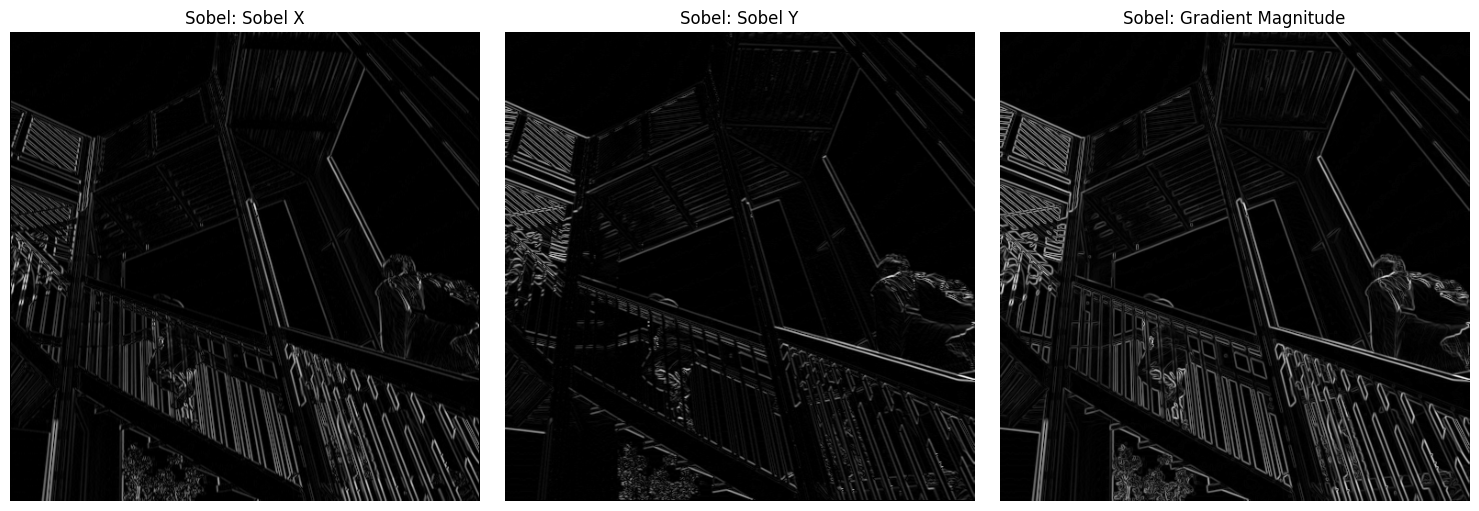

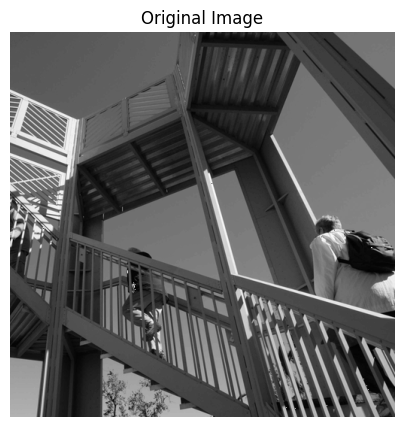

In [50]:
def apply_sobel_and_visualize(image):
    # Sobel X (horizontal edges)
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3) #image, output_image+depth of output image,order of der in x,y.kernel_size

    # Sobel Y (vertical edges)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Gradient Magnitude
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Display Sobel X, Sobel Y, and Gradient Magnitude
    display_category("Sobel", [
        ("Sobel X", sobel_x),
        ("Sobel Y", sobel_y),
        ("Gradient Magnitude", gradient_magnitude)
    ])

apply_sobel_and_visualize(image_uint8)
show_original_image(image_uint8)


### Prewitt X (horizontal edges):

The Prewitt X operator detects horizontal edges and is represented by the following matrix:

$$
\text{Prewitt X} =
\begin{bmatrix}
-1 & 0 & +1 \\
-1 & 0 & +1 \\
-1 & 0 & +1
\end{bmatrix}
$$

### Prewitt Y (vertical edges):

The Prewitt Y operator detects vertical edges and is represented by the following matrix:

$$
\text{Prewitt Y} =
\begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
+1 & +1 & +1
\end{bmatrix}
$$





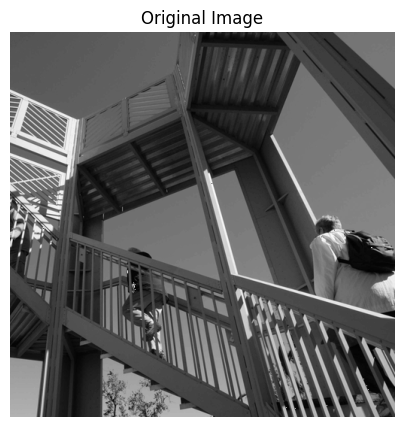

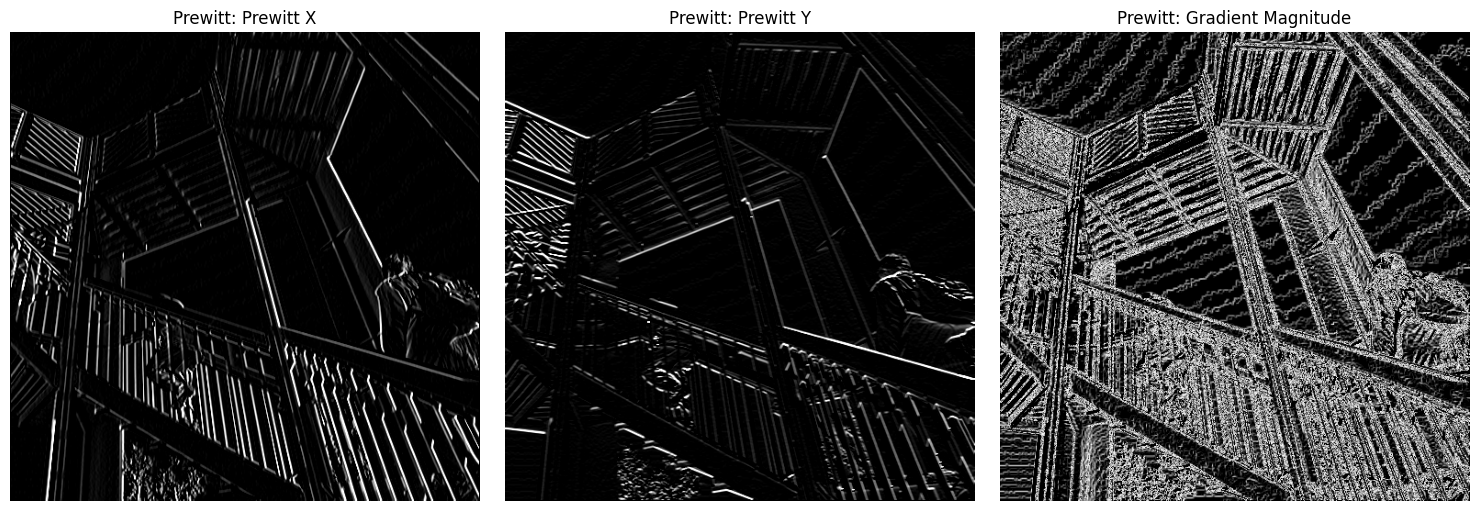

In [51]:
# Follow the given style for Prewitt filtering
def apply_prewitt_and_visualize(image):
    """Applies Prewitt X and Prewitt Y filters to the image and displays the results."""

    # Prewitt X (horizontal edges)
    prewitt_x = np.array([[-1, 0, 1],
                [-1, 0, 1],
                [-1, 0, 1]])

    # Prewitt Y (vertical edges)
    prewitt_y = np.array([[-1, -1, -1],
                [ 0,  0,  0],
                [ 1,  1,  1]])

    # Apply the Prewitt filters using cv2.filter2D
    filtered_x = cv2.filter2D(image, -1, prewitt_x)
    filtered_y = cv2.filter2D(image, -1, prewitt_y)

    # Compute gradient magnitude
    gradient_magnitude = np.sqrt(filtered_x**2 + filtered_y**2)

    # Display Prewitt X, Prewitt Y, and Gradient Magnitude
    display_category("Prewitt", [
        ("Prewitt X", filtered_x),
        ("Prewitt Y", filtered_y),
        ("Gradient Magnitude", gradient_magnitude)
    ])

show_original_image(image_uint8)
apply_prewitt_and_visualize(image_uint8)


###Scharr Operator:
The Scharr Operator is an enhanced version of the Sobel operator, which gives better precision for detecting edges.

###Scharr X:
$$
\text{Scharr X} =
\begin{bmatrix}
-3 & 0 & +3 \\
-10 & 0 & +10 \\
-3 & 0 & +3
\end{bmatrix}
$$
###Scharr Y:
$$
\text{Scharr Y} =
\begin{bmatrix}
-3 & -10 & -3 \\
0 & 0 & 0 \\
+3 & +10 & +3
\end{bmatrix}
$$


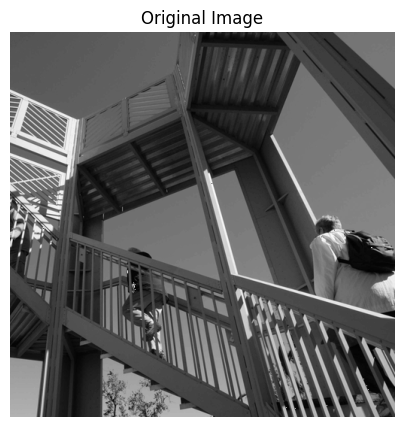

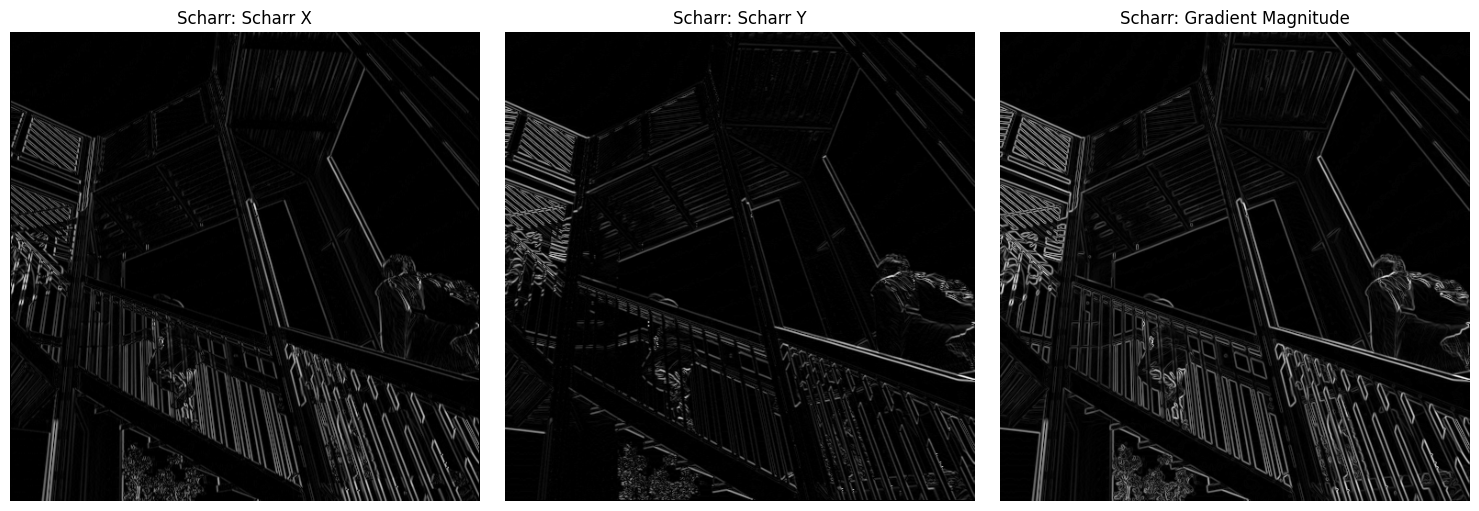

In [54]:
def apply_scharr_and_visualize(image):
    """Applies Scharr X and Scharr Y filters to the image and displays the results."""

    # Scharr X (horizontal edges)
    scharr_x = cv2.Scharr(image, cv2.CV_64F, 1, 0)

    # Scharr Y (vertical edges)
    scharr_y = cv2.Scharr(image, cv2.CV_64F, 0, 1)

    # Compute gradient magnitude
    gradient_magnitude = np.sqrt(scharr_x**2 + scharr_y**2)

    # Display Scharr X, Scharr Y, and Gradient Magnitude
    display_category("Scharr", [
        ("Scharr X", scharr_x),
        ("Scharr Y", scharr_y),
        ("Gradient Magnitude", gradient_magnitude)
    ])

show_original_image(image_uint8)
apply_scharr_and_visualize(image_uint8)


###Laplacian of Gaussian (LoG):
The Laplacian of Gaussian operator detects edges by calculating the second derivative of the image after applying a Gaussian blur to reduce noise.
It is very noise sensitive.
###Laplacian Kernel:
$$
\text{Laplacian} =
\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & +0
\end{bmatrix}
$$

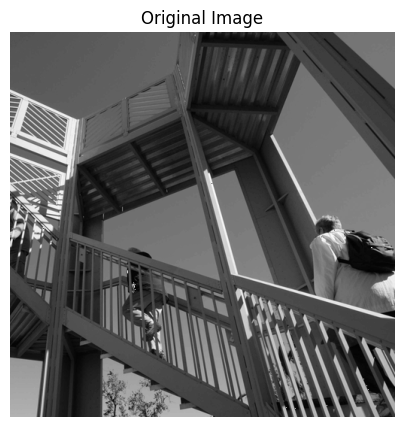

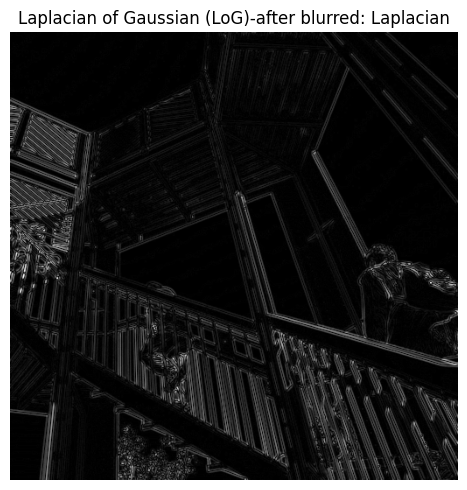

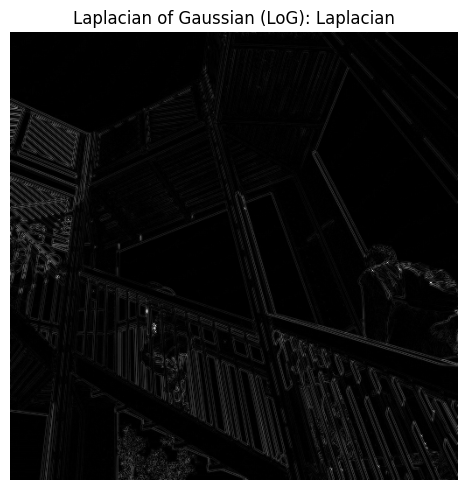

In [70]:
def apply_laplacian_and_visualize(image,blur=True):
  if blur:
    #blur can help to magnify the noise
    gaussian_blur = cv2.GaussianBlur(image, (3, 3), 0)
    laplacian = cv2.Laplacian(gaussian_blur, cv2.CV_64F,ksize=3)
    display_category("Laplacian of Gaussian (LoG)-after blurred", [
          ("Laplacian", laplacian)
      ])
  else:
    laplacian = cv2.Laplacian(image, cv2.CV_64F,ksize=3)
    display_category("Laplacian of Gaussian (LoG)", [
          ("Laplacian", laplacian)
      ])
show_original_image(image_uint8)
apply_laplacian_and_visualize(image_uint8)
apply_laplacian_and_visualize(image_uint8,blur=False)

# Other kernels:
Difference of Gaussian (DoG) Filter:
The DoG filter subtracts one blurred version of the image from another, highlighting edges and textures. The formula is:
$$
 \text {DoG}(x,y) = G(x,y,\sigma_1)- G(x, y, \sigma_2)
$$

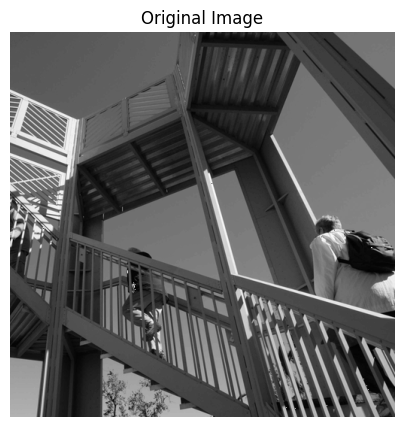

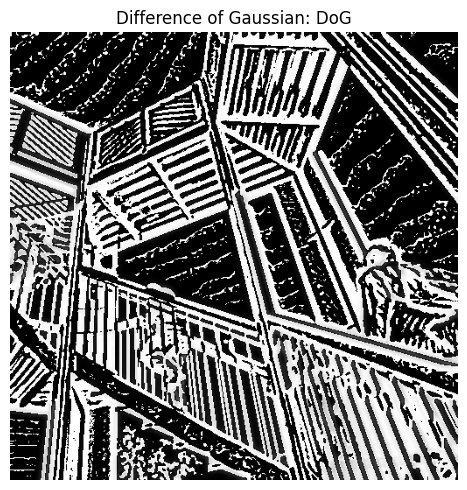

In [72]:
def apply_dog(image, sigma1=1.0, sigma2=2.0):
    blurred1 = cv2.GaussianBlur(image, (0, 0), sigma1)
    blurred2 = cv2.GaussianBlur(image, (0, 0), sigma2)
    dog = blurred1 - blurred2
    display_category("Difference of Gaussian", [("DoG", dog)])
show_original_image(image_uint8)
apply_dog(image_uint8, sigma1=1.0, sigma2=3.0)


###Mean, Variance, Median, Minimum, Maximum Filters:
These filters operate over a window defined by a radius
σ and apply the respective operation.

In [ ]:
def apply_statistical_filters(image, radius=3):
    mean_filtered = cv2.blur(image, (radius, radius)) #averaged pixels
    variance_filtered = cv2.Laplacian(image, cv2.CV_64F) #variance of pixels
    median_filtered = cv2.medianBlur(image, radius) #...
    min_filtered = nd.minimum_filter(image, size=radius) #...
    max_filtered = nd.maximum_filter(image, size=radius) #..

    display_category("Statistical Filters", [
        ("Mean Filter", mean_filtered),
        ("Variance Filter", variance_filtered),
        ("Median Filter", median_filtered),
        ("Minimum Filter", min_filtered),
        ("Maximum Filter", max_filtered)
    ])

### Anisotropic Diffusion

**Anisotropic Diffusion** is an edge-preserving smoothing technique. It reduces noise **without blurring** the edges. Unlike conventional smoothing methods, which blur edges along with noise, anisotropic diffusion applies a varying amount of diffusion (smoothing) depending on the presence of edges, thereby preserving important structures while reducing noise.

The mathematical model for anisotropic diffusion is:

$$
\frac{\partial I(x, y, t)}{\partial t} = \nabla \cdot (c(x, y, t) \nabla I(x, y, t))
$$

Where:
- \( I(x, y, t) \) is the image intensity at position \( (x, y) \) and time \( t \).
- \( ∇ ) is the divergence operator.
- \( c(x, y, t) \) is the edge-stopping function, which reduces the diffusion at edges.

The parameters controlling anisotropic diffusion are:
- **Iterations**: The number of iterations defines how much the image is smoothed.
- **Sigma (σ)**: The standard deviation controls the amount of smoothing per iteration.
- **Edge threshold**: Controls the sensitivity of the diffusion to edges, helping to preserve them.



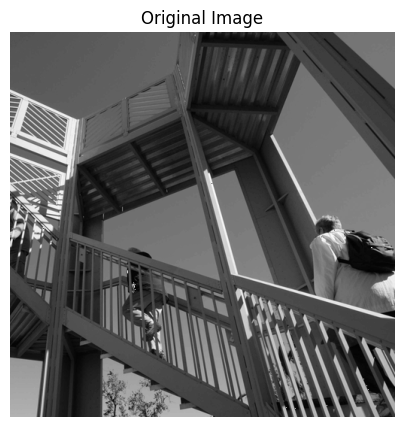

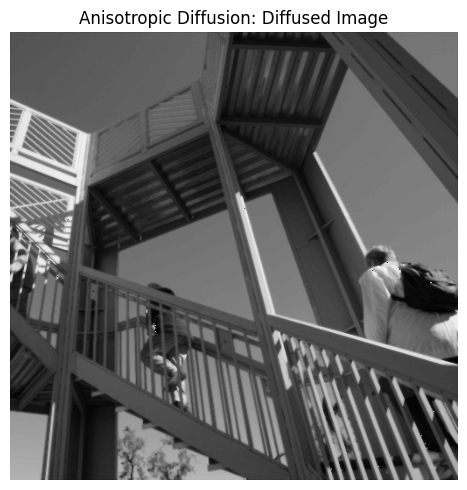

In [77]:
def apply_anisotropic_diffusion(image, iterations=20, sigma=1.0):
    # Ensure the image is 3-channel (RGB) since anisotropic diffusion requires it
    if len(image.shape) == 2:  # If the image is grayscale, convert to RGB
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    diffused_image = cv2.ximgproc.anisotropicDiffusion(image, alpha=0.01, K=0.35, niters=iterations)
    display_category("Anisotropic Diffusion", [("Diffused Image", diffused_image)])
show_original_image(image_uint8)
apply_anisotropic_diffusion(image_uint8, iterations=20, sigma=0.1)

More kernels can be found via:
https://imagej.net/plugins/tws/